## Problem Statement
Problem Statement:
Create a machine learning model to predict revenue of the restaurant based on
the features present in the dataset.


#### Dataset Attributes:
1. ID - Restaurant ID
2. Name - Name of the Restaurant
3. Franchise - Restaurant has franchise or not
4. Category - specific type of category provided by restaurant
5. No_of_item - Different types of items provided by restaurant
6. Order_Placed - Order placed by customer to restaurant (in lacs)
7. Revenue - Total amount of income generated by the restaurant

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
data = pd.read_csv("revenue_prediction.csv")


In [117]:
data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [118]:
data.shape

(100, 8)

In [119]:
data.size

800

In [120]:
data.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [8]:
data.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [18]:
X = data.iloc[:,:-1]
X

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8
2,103,Chuy's,Yes,Chicken,Pune,25,1.9
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2
...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1


In [19]:
Y = data['Revenue']
Y

0     5953753
1     7223131
2     2555379
3     2175511
4     4816715
       ...   
95    1270499
96    6412623
97    6694797
98    2344689
99    4567678
Name: Revenue, Length: 100, dtype: int64

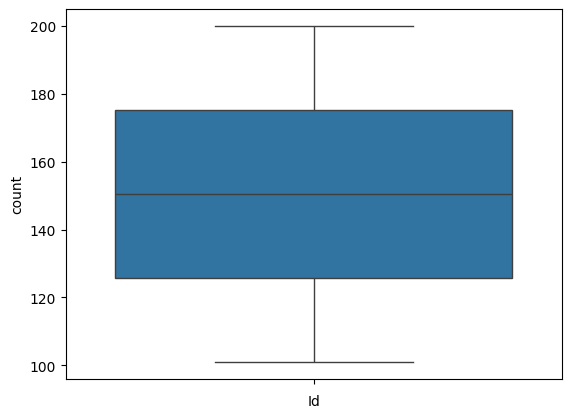

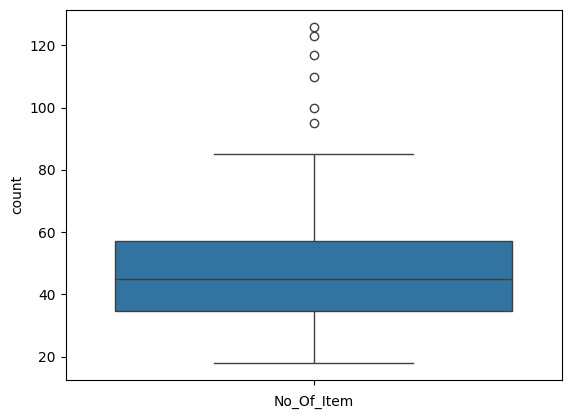

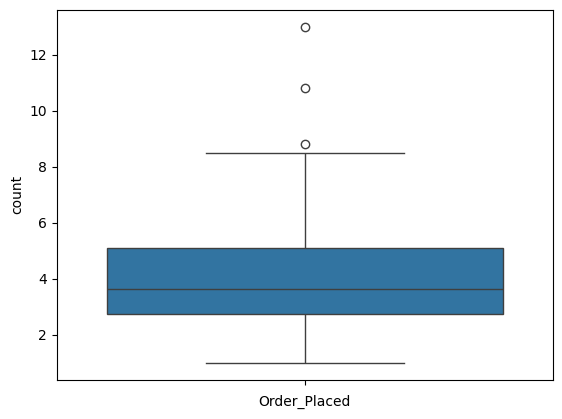

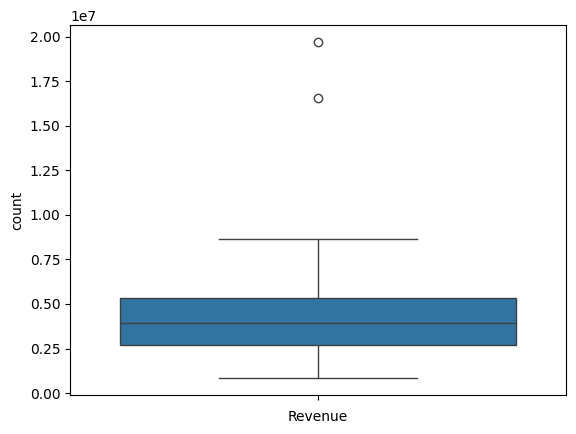

In [39]:
for i in data.columns:
   if data[i].dtypes != 'O':
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()


In [40]:
### ----- transformations  import math
data['y_log'] = data['No_Of_Item'].apply(lambda x: None if x <= 0 else math.log(x))

# Take the square root of the 'y' column
data['y_sqrt'] = data['No_Of_Item'].apply(lambda x: None if x < 0 else math.sqrt(x))

# Take the inverse of the 'y' column
data['y_inv'] = data['No_Of_Item'].apply(lambda x: None if x == 0 else 1/x)

In [49]:
data = data.drop(columns = ['y_log', 'y_sqrt', 'y_inv'])
data

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55.00,5.5,5953753.0
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72.00,6.8,7223131.0
2,103,Chuy's,Yes,Chicken,Pune,25.00,1.9,2555379.0
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,22.95,2.5,2175511.0
4,105,PolloTropical,Yes,Pizza,Noida,48.00,4.2,4816715.0
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,22.95,1.6,1749249.7
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75.00,6.3,6412623.0
97,198,Giordano's,Yes,Varied Menu,Gurugram,77.00,6.2,6694797.0
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25.00,2.1,2344689.0


In [44]:
data.columns

Index(['Id', 'Name', 'Franchise', 'Category', 'City', 'No_Of_Item',
       'Order_Placed', 'Revenue', 'y_log', 'y_sqrt', 'y_inv'],
      dtype='object')

Index(['Id', 'Name', 'Franchise', 'Category', 'City', 'No_Of_Item',
       'Order_Placed', 'Revenue', 'y_log', 'y_sqrt', 'y_inv'],
      dtype='object')

In [50]:
### Winsorization involves replacing extreme values with less extreme values. Instead of removing the outliers,
##Winsorization replaces them with values that are closer to the rest of the data.
#For example, you can replace outliers with the nearest values within a certain percentile range. lower_percentile = 5, upper_percentile = 95

lower_percentile = 5
upper_percentile = 95

# Apply Winsorization to specific columns
columns_to_winsorize = ['No_Of_Item', 'Order_Placed', 'Revenue']  # Replace with the columns you want to Winsorize

for column in columns_to_winsorize:
    lower_limit = np.percentile(data[column], lower_percentile)
    upper_limit = np.percentile(data[column], upper_percentile)

    # Replace values below lower limit with lower limit
    data.loc[data[column] < lower_limit, column] = lower_limit

    # Replace values above upper limit with upper limit
    data.loc[data[column] > upper_limit, column] = upper_limit

# Save the Winsorized data to a new CSV file
data.to_csv('winsorized_dataset.csv', index=False)

In [51]:
data1 = pd.read_csv("winsorized_dataset.csv")

In [53]:
data1

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55.0000,5.5,5953753.000
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72.0000,6.8,7223131.000
2,103,Chuy's,Yes,Chicken,Pune,25.0000,1.9,2555379.000
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,22.9975,2.5,2175511.000
4,105,PolloTropical,Yes,Pizza,Noida,48.0000,4.2,4816715.000
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,22.9975,1.6,1755728.035
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75.0000,6.3,6412623.000
97,198,Giordano's,Yes,Varied Menu,Gurugram,77.0000,6.2,6694797.000
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25.0000,2.1,2344689.000


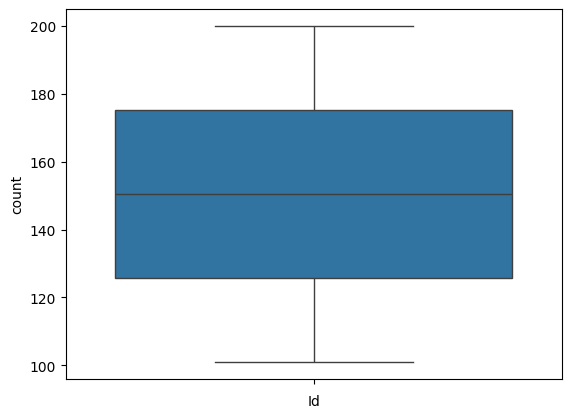

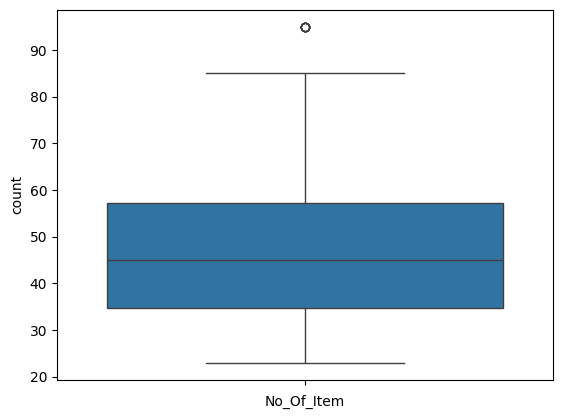

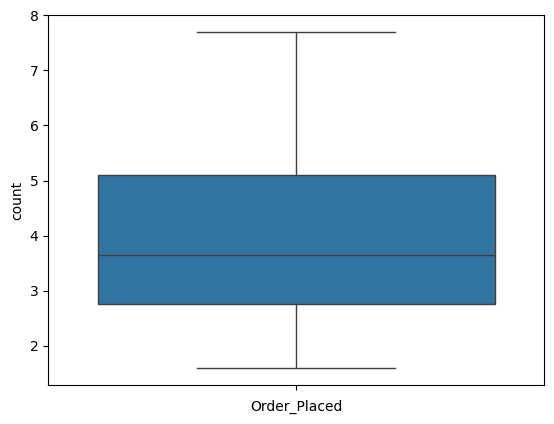

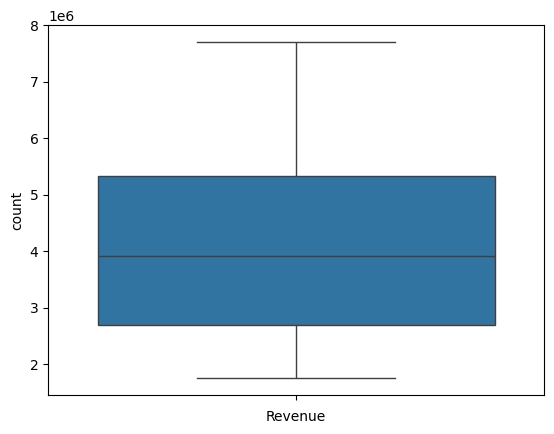

In [54]:
for i in data.columns:
   if data[i].dtypes != 'O':
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

<ipython-input-55-0814b4f1b830>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=data['No_Of_Item'], y=data['Revenue'], palette='gist_rainbow_r').set_title("Relationship between the No of items with revenue")


Text(0.5, 1.0, 'Relationship between the No of items with revenue')

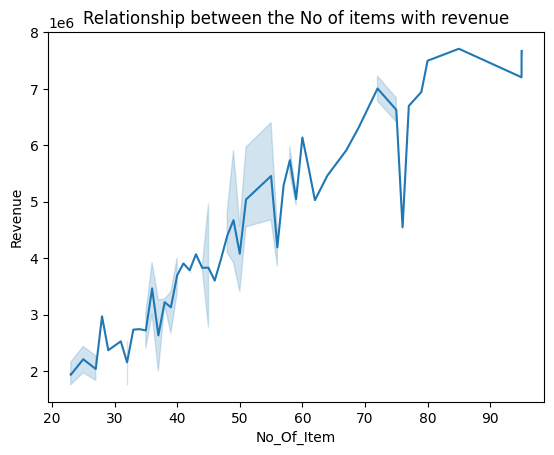

In [55]:
import seaborn as sns
sns.lineplot(x=data['No_Of_Item'], y=data['Revenue'], palette='gist_rainbow_r').set_title("Relationship between the No of items with revenue")

<ipython-input-66-effdd55e7e2f>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=data[i], y=data['Revenue'], palette='gist_rainbow_r').set_title("Relationship between the No of items with revenue")
<ipython-input-66-effdd55e7e2f>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=data[i], y=data['Revenue'], palette='gist_rainbow_r').set_title("Relationship between the No of items with revenue")
<ipython-input-66-effdd55e7e2f>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=data[i], y=data['Revenue'], palette='gist_rainbow_r').set_title("Relationship between the No of items with revenue")
<ipython-input-66-effdd55e7e2f>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=data[i], y=data['Revenue'], palette='gist_rainbow_r').set_title("Relationship between the No of items with revenue")
<ipython-input-6

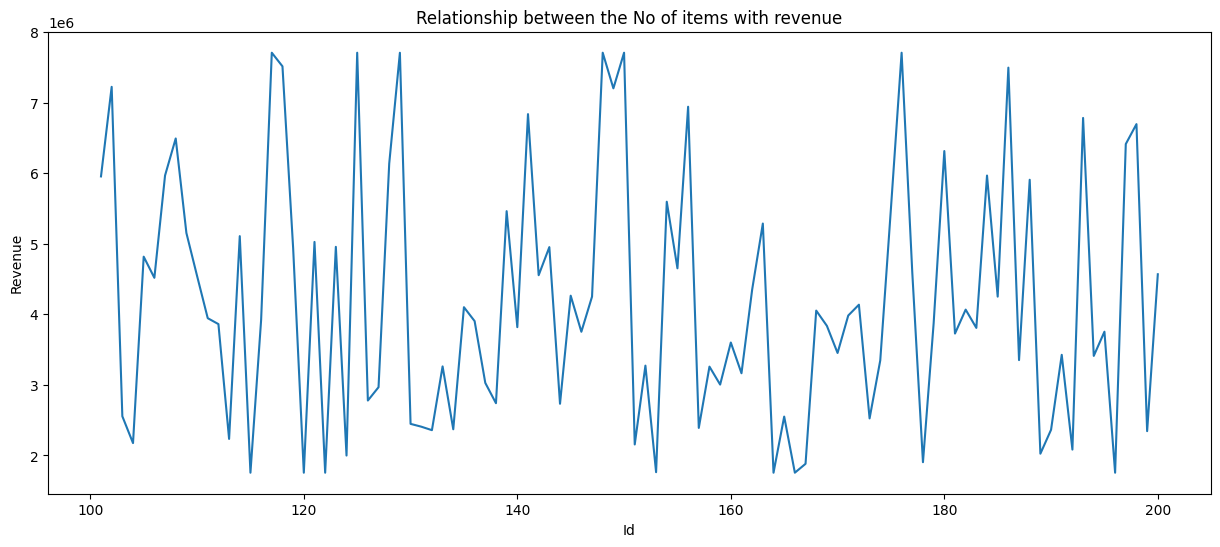

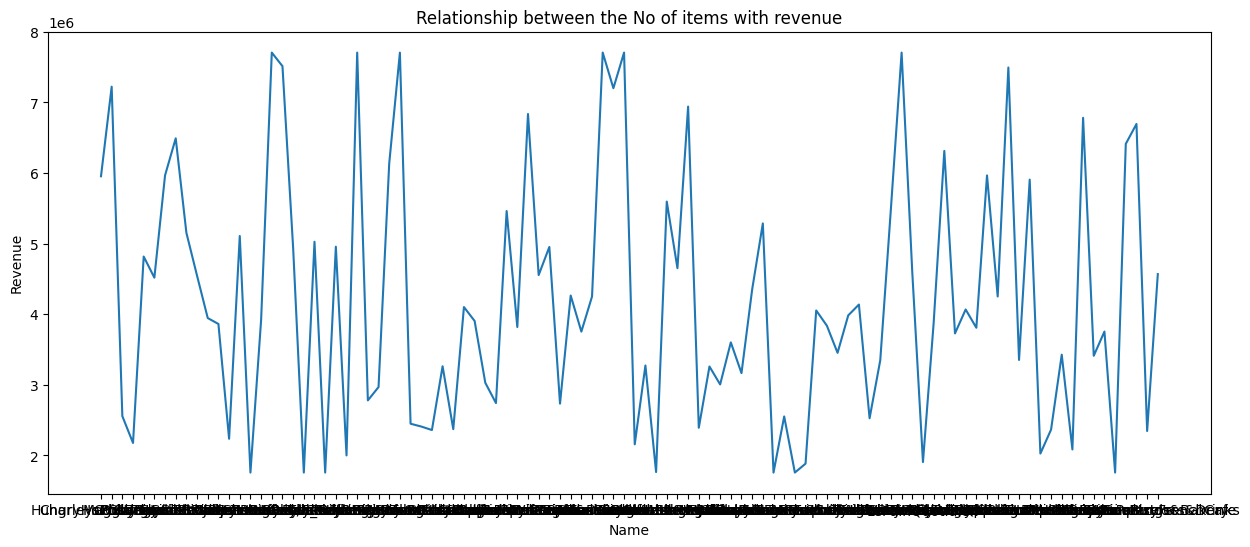

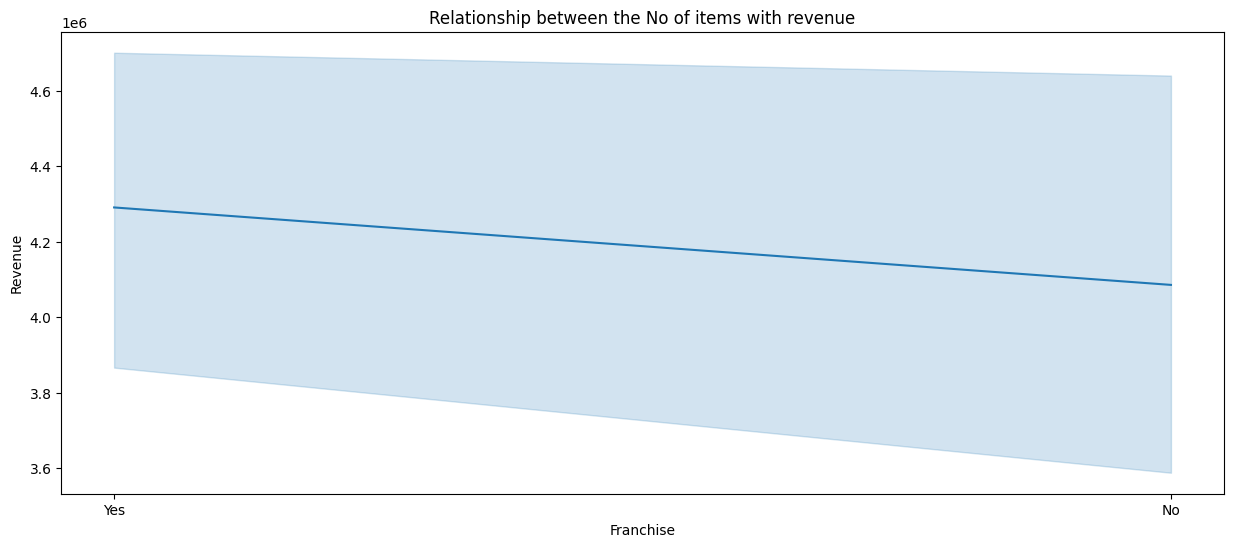

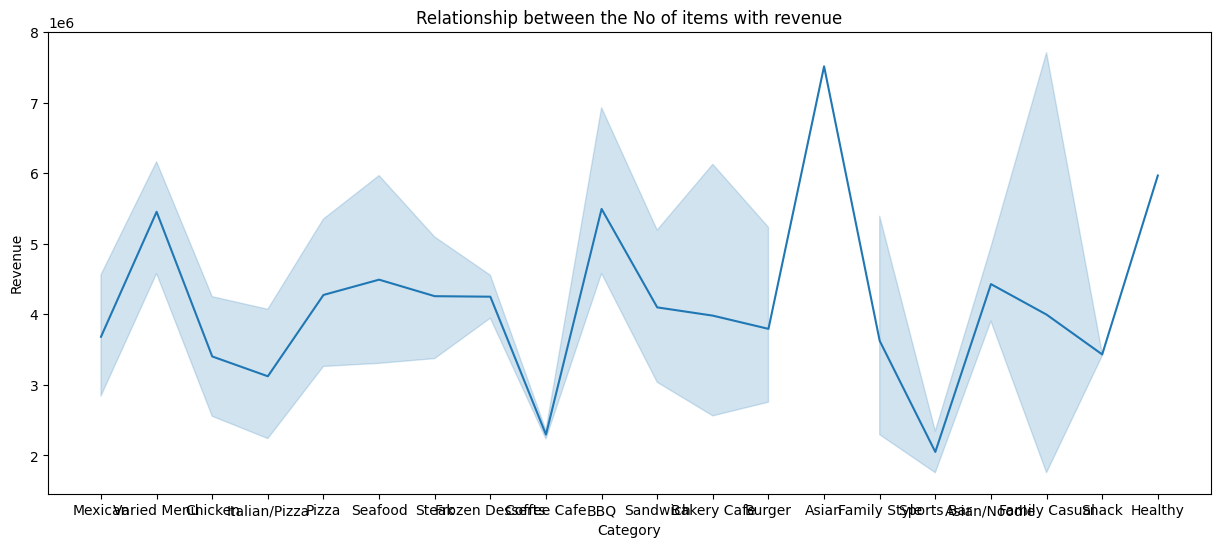

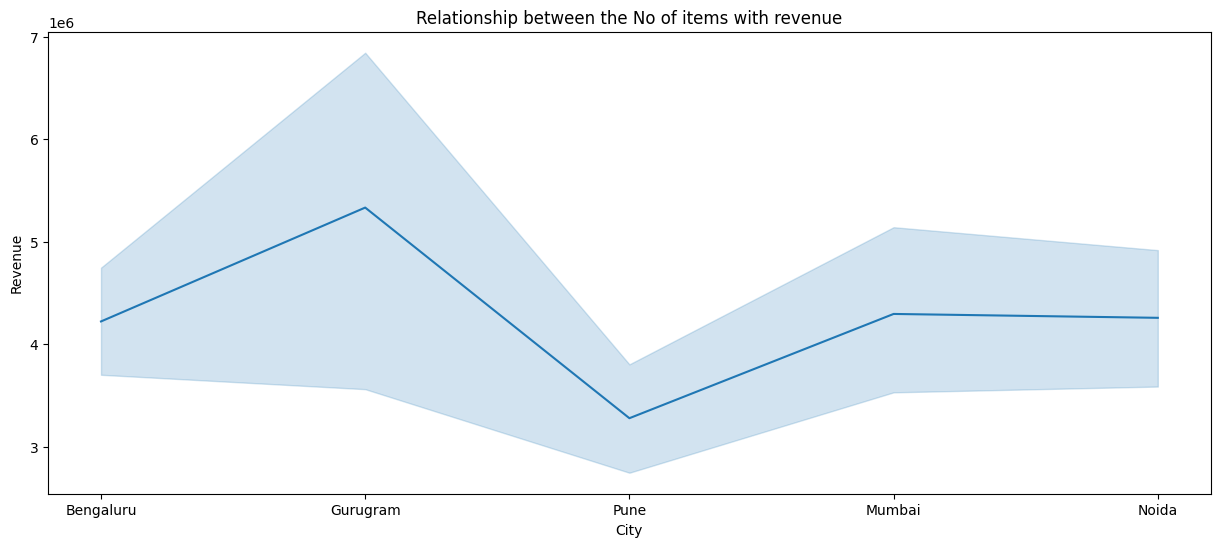

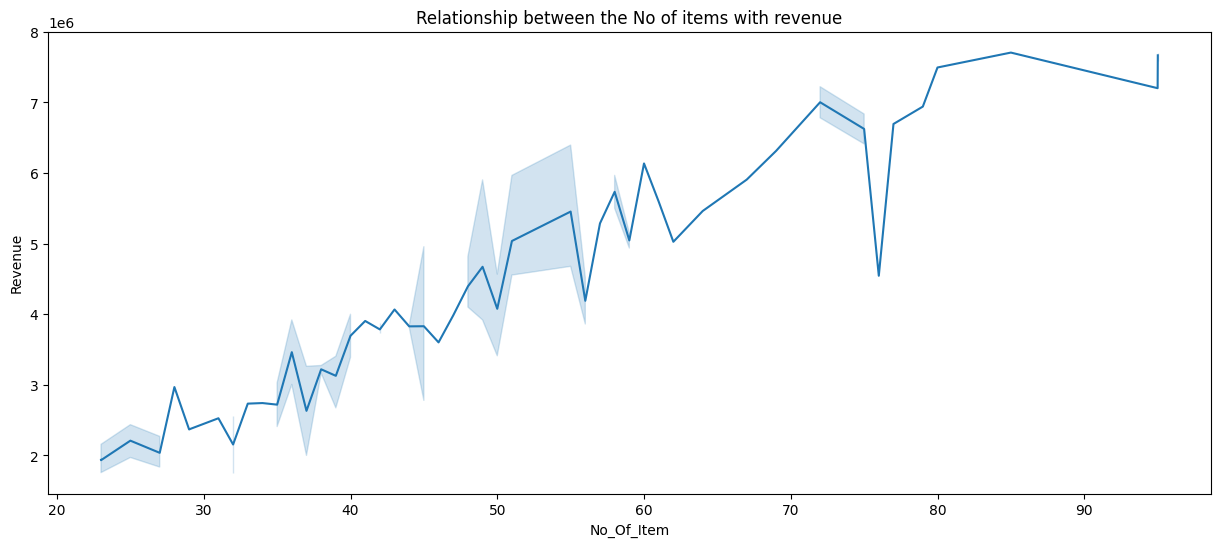

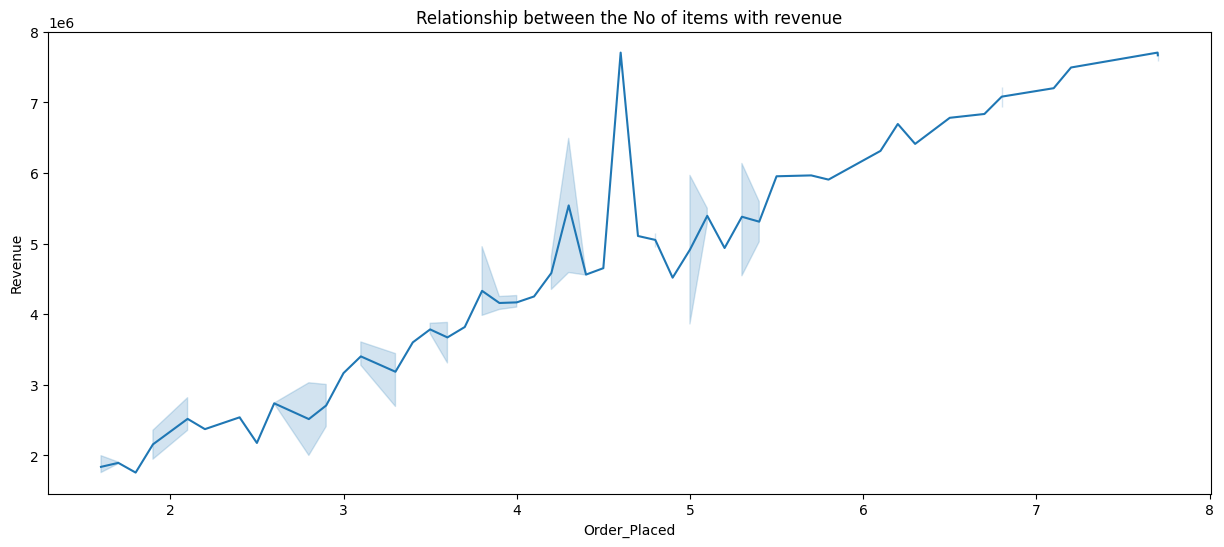

In [66]:
X = data.iloc[:,:-1]
for i in X.columns:
  plt.figure(figsize= (15,6))
  sns.lineplot(x=data[i], y=data['Revenue'], palette='gist_rainbow_r').set_title("Relationship between the No of items with revenue")

<Figure size 1500x600 with 0 Axes>

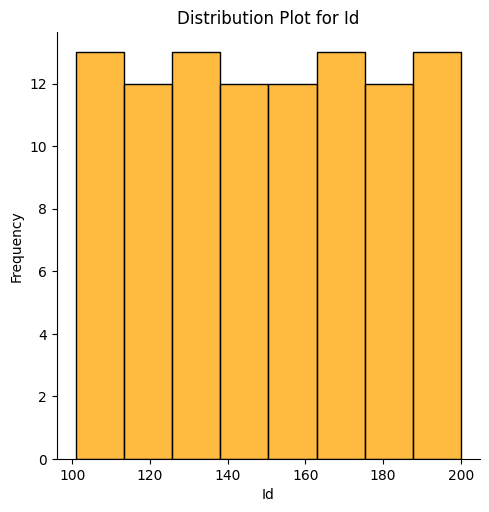

<Figure size 1500x600 with 0 Axes>

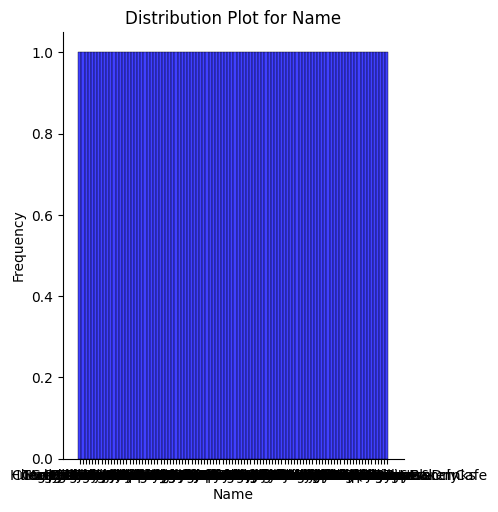

<Figure size 1500x600 with 0 Axes>

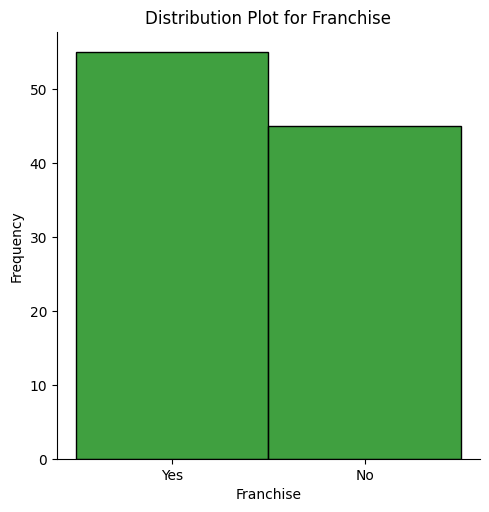

<Figure size 1500x600 with 0 Axes>

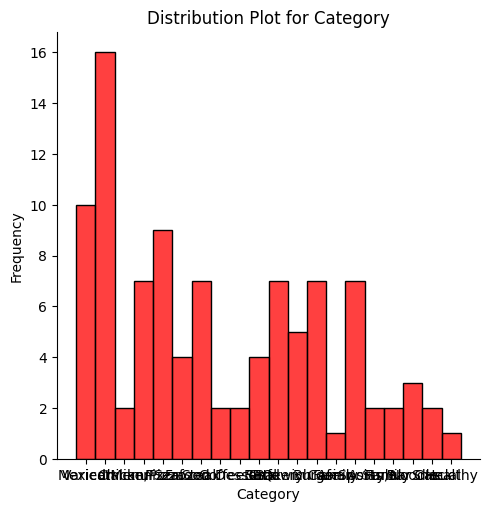

<Figure size 1500x600 with 0 Axes>

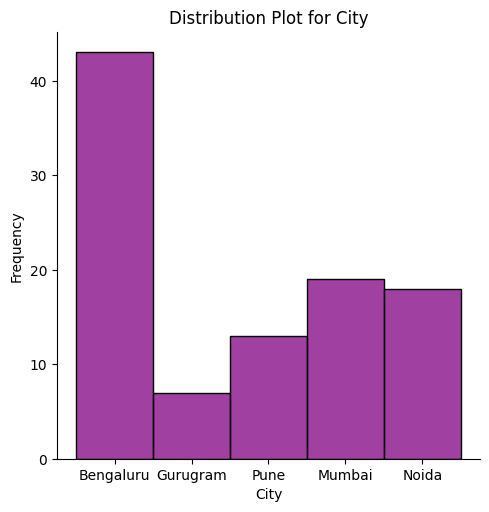

<Figure size 1500x600 with 0 Axes>

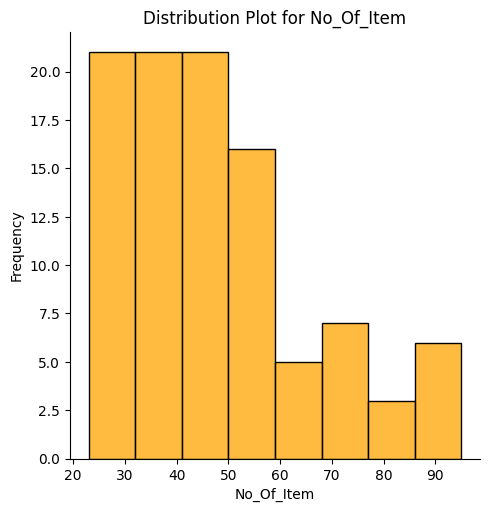

<Figure size 1500x600 with 0 Axes>

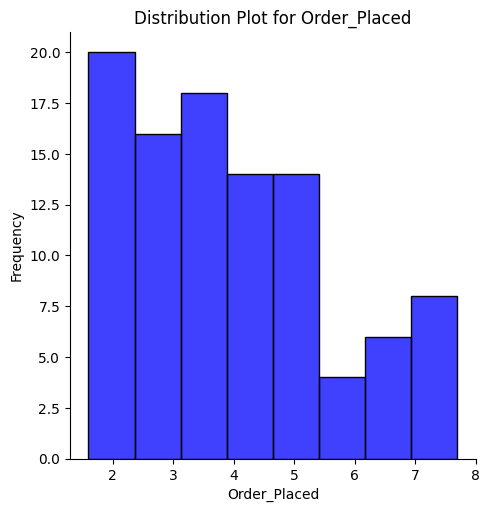

In [71]:
colors = ['orange', 'blue', 'green', 'red', 'purple']  # Define different colors

for i, column_name in enumerate(X):
    plt.figure(figsize=(15, 6))
    sns.displot(x=data1[column_name], color=colors[i % len(colors)])  # Use modulus to loop over colors
    plt.title(f'Distribution Plot for {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [94]:
max_profit_index = data1['Revenue'].idxmax()

# Retrieve the entire row corresponding to the maximum profit
max_profit_row = data1.loc[max_profit_index]

print("Product with Max Revenue:")
print(max_profit_row)

Product with Max Revenue:
Id                       117
Name             ZoesKitchen
Franchise                Yes
Category              Burger
City               Bengaluru
No_Of_Item           95.0125
Order_Placed           7.701
Revenue         7706343.7075
Name: 16, dtype: object


#### Maximum Revenue



The product 'ZoesKitchen' from Bengaluru, falling under the 'Burger' category, with 95.0125 items ordered, generating a revenue of 7706343.7075, has the maximum revenue.

In [95]:
min_profit_index = data1['Revenue'].idxmin()

# Retrieve the entire row corresponding to the maximum profit
min_profit_row = data1.loc[min_profit_index]

print("Product with Min Revenue:")
print(min_profit_row)

Product with Min Revenue:
Id                       115
Name            Peet'sCoffee
Franchise                 No
Category            Sandwich
City               Bengaluru
No_Of_Item           22.9975
Order_Placed             1.8
Revenue          1755728.035
Name: 14, dtype: object


#### Maximum Revenue
The product Peet'sCoffee from bengaluru, falling under the 'Sandwich' category, with 22.9975 items ordered , generating a revenu of 1755728.035 has minimum revenue.

In [96]:
data1.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55.0000,5.5,5953753.0
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72.0000,6.8,7223131.0
2,103,Chuy's,Yes,Chicken,Pune,25.0000,1.9,2555379.0
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,22.9975,2.5,2175511.0
4,105,PolloTropical,Yes,Pizza,Noida,48.0000,4.2,4816715.0


In [98]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in data1.columns:
    # Check if the column is categorical (dtype == 'object')
    if data1[column].dtype == 'object':
        # Fit label encoder and transform the column
        data1[column] = label_encoder.fit_transform(data1[column])

# Print the modified DataFrame
print(data1)

     Id  Name  Franchise  Category  City  No_Of_Item  Order_Placed  \
0   101    40          1        12     0     55.0000           5.5   
1   102    14          0        19     1     72.0000           6.8   
2   103    16          1         5     4     25.0000           1.9   
3   104    60          1        11     2     22.9975           2.5   
4   105    68          1        13     3     48.0000           4.2   
..  ...   ...        ...       ...   ...         ...           ...   
95  196    96          0        11     0     22.9975           1.6   
96  197    47          1        19     0     75.0000           6.3   
97  198    35          1        19     1     77.0000           6.2   
98  199    41          1        17     4     25.0000           2.1   
99  200    55          0         2     2     50.0000           4.4   

        Revenue  
0   5953753.000  
1   7223131.000  
2   2555379.000  
3   2175511.000  
4   4816715.000  
..          ...  
95  1755728.035  
96  6412623.000

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    float64
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.4+ KB


In [100]:

from sklearn.preprocessing import StandardScaler

# Extract numerical columns
numerical_columns = data1.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to the numerical data and transform it
scaled_data = scaler.fit_transform(data1[numerical_columns])

# Replace original numerical columns with scaled data
data1[numerical_columns] = scaled_data

# Print the modified DataFrame
print(data1)

          Id      Name  Franchise  Category      City  No_Of_Item  \
0  -1.714816 -0.329106   0.904534  0.092083 -1.006689    0.353780   
1  -1.680173 -1.229818  -1.105542  1.331660 -0.340008    1.236997   
2  -1.645531 -1.160532   0.904534 -1.147494  1.660037   -1.204838   
3  -1.610888  0.363749   0.904534 -0.085000  0.326674   -1.308875   
4  -1.576245  0.640891   0.904534  0.269165  0.993355   -0.009897   
..       ...       ...        ...       ...       ...         ...   
95  1.576245  1.610888  -1.105542 -0.085000 -1.006689   -1.308875   
96  1.610888 -0.086607   0.904534  1.331660 -1.006689    1.392859   
97  1.645531 -0.502320   0.904534  1.331660 -0.340008    1.496767   
98  1.680173 -0.294463   0.904534  0.977495  1.660037   -1.204838   
99  1.714816  0.190535  -1.105542 -1.678741  0.326674    0.094011   

    Order_Placed   Revenue  
0       0.880608  0.992445  
1       1.639275  1.710044  
2      -1.220316 -0.928707  
3      -0.870162 -1.143452  
4       0.121941  0.349661

### Linear Regression

In [106]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Separate the features (X) and the target variable (y)
X = data1.drop(columns=['Revenue'])  # Drop the target column
y = data1['Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [108]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 0.03384299639535781
Mean Absolute Error (MAE): 0.14051232444895884
R-squared (R^2): 0.9276779829335104


### Decision Tree

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Separate the features (X) and the target variable (y)
X = data1.drop(columns=['Revenue'])  # Drop the target column
y = data1['Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the decision tree regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 0.062140516641060496
Mean Absolute Error (MAE): 0.17275999164256697
R-squared (R^2): 0.8672065720028352


### Random Forest

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score



# Separate the features (X) and the target variable (y)
X = data1.drop(columns=['Revenue'])  # Drop the revenue column
y = data1['Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 0.07247721640674328
Mean Absolute Error (MAE): 0.1973834934317154
R-squared (R^2): 0.8451171870047791


### GradientBoostingRegressor


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Separate the features (X) and the target variable (y)
X = data1.drop(columns=['Revenue'])  # Drop the revenue column
y = data1['Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the Gradient Boosting regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 0.0635869335328352
Mean Absolute Error (MAE): 0.1765287553257153
R-squared (R^2): 0.8641155990313482


### Linear Regression by taking the relevant features


In [121]:
data1 =data1.drop(columns=["Id","Name","Franchise","Category","City","No_Of_Item"])

In [123]:
x=data1.iloc[:,:-1].values
y=data1.iloc[:,-1].values

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [126]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score



# Separate the features (X) and the target variable (y)
X = data1.drop(columns=['Revenue'])  # Drop the target column
y = data1['Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 0.034638437628322666
Mean Absolute Error (MAE): 0.11899038173929047
R-squared (R^2): 0.925978135976881
